Step 1: Import Required Libraries

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


 STEP 2: Upload and Load Dataset

Upload CSV File From Your local system



In [195]:
from google.colab import files
uploaded = files.upload()

Saving matches.csv to matches (6).csv


Loadin The Dataset of Matches

In [196]:
matches = pd.read_csv('matches.csv')


In [197]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [198]:
matches.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


STEP 3: Data Cleaning

 Droping the irrelevant columns

In [199]:
matches.drop(['umpire1', 'umpire2', 'umpire3', 'result', 'dl_applied', 'id'], axis=1, inplace=True)

Drop rows where 'winner' is null

In [200]:
matches.dropna(subset=['winner'], inplace=True)

Standardize team names

In [201]:
matches.replace({'Kings XI Punjab': 'Punjab Kings', 'Delhi Daredevils': 'Delhi Capitals'}, inplace=True)

In [202]:
matches['Season'] = matches['Season'].astype(str).str.extract('(\d+)').astype(int)
matches = matches[matches['Season'] <= 2019]


STEP 4: Visualizations (EDA)

Matches per Season

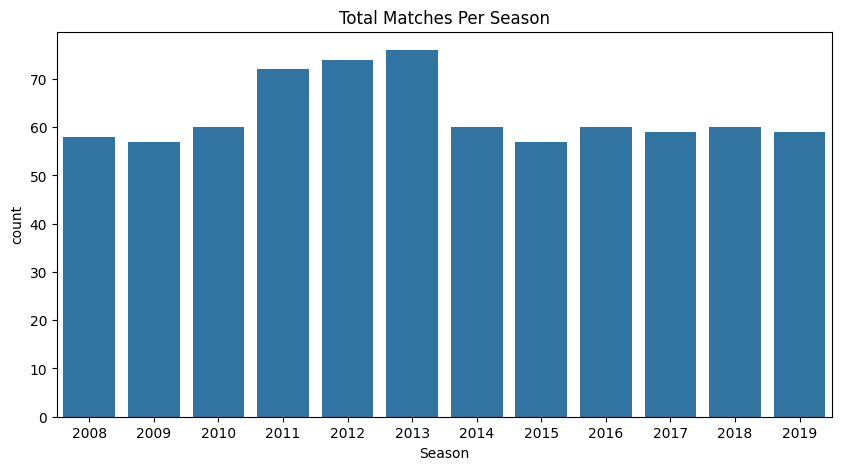

In [203]:
plt.figure(figsize=(10,5))
sns.countplot(data=matches, x='Season')
plt.title("Total Matches Per Season")
plt.show()


🟩 Wins per Team

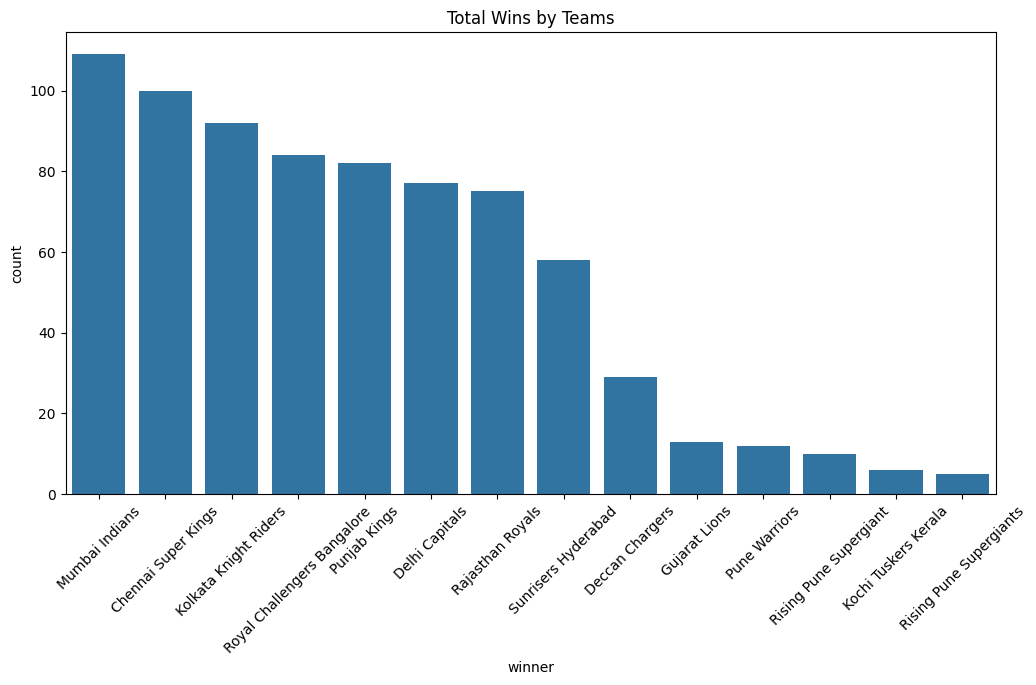

In [204]:
plt.figure(figsize=(12,6))
sns.countplot(data=matches, x='winner', order=matches['winner'].value_counts().index)
plt.title("Total Wins by Teams")
plt.xticks(rotation=45)
plt.show()


STEP 5: Prepare Features

In [205]:
df = matches[['Season', 'team1', 'team2', 'toss_winner', 'venue', 'city', 'winner']]


 STEP 6: Encode Data (OneHotEncoder)

In [216]:
X = df.drop('winner', axis=1)
y = df['winner']

categorical_cols = ['team1', 'team2', 'toss_winner', 'venue', 'city']

# One-hot encoding for categorical columns
# Added handle_unknown='ignore' to the OneHotEncoder
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

X_encoded = ct.fit_transform(X)


 STEP 7: Train-Test Split & Model Training

In [207]:
from sklearn.impute import SimpleImputer

# Impute missing values in the encoded features
# Use mean imputation as an example, you might choose a different strategy
imputer = SimpleImputer(strategy='mean')
X_encoded_imputed = imputer.fit_transform(X_encoded)


X_train, X_test, y_train, y_test = train_test_split(X_encoded_imputed, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

STEP 8: Evaluation

In [208]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5629139072847682

Classification Report:
                              precision    recall  f1-score   support

        Chennai Super Kings       0.53      0.50      0.51        18
            Deccan Chargers       0.00      0.00      0.00         8
             Delhi Capitals       0.67      0.44      0.53        18
              Gujarat Lions       1.00      0.50      0.67         2
       Kochi Tuskers Kerala       0.00      0.00      0.00         1
      Kolkata Knight Riders       0.56      0.71      0.62        21
             Mumbai Indians       0.52      0.67      0.59        18
              Pune Warriors       0.00      0.00      0.00         1
               Punjab Kings       0.53      0.59      0.56        17
           Rajasthan Royals       0.75      0.60      0.67        20
     Rising Pune Supergiant       1.00      0.50      0.67         2
    Rising Pune Supergiants       1.00      1.00      1.00         1
Royal Challengers Bangalore       0.53      0.60

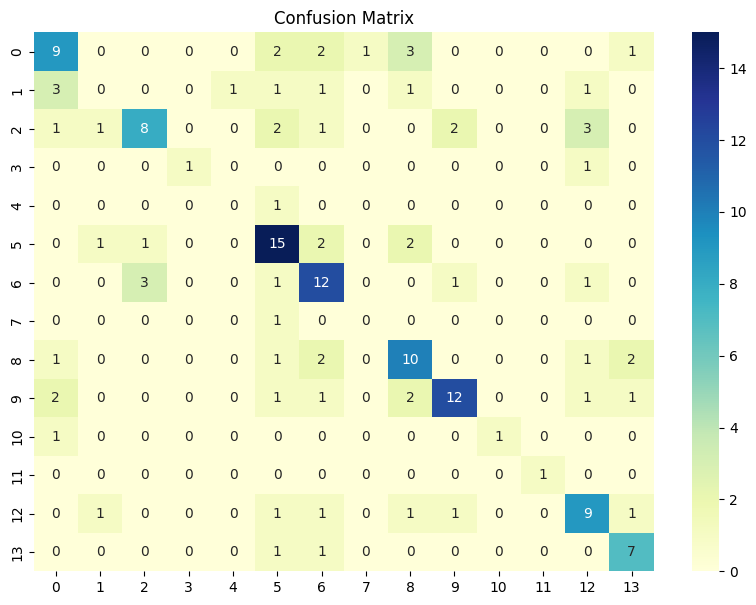

In [209]:
# Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", fmt='d')
plt.title("Confusion Matrix")
plt.show()


 STEP 9: Predicting Past Champions (2008–2019)

In [210]:
winners = matches.groupby(['Season', 'winner']).size().reset_index(name='wins')
Season_winner = winners.sort_values(['Season', 'wins'], ascending=[True, False]).drop_duplicates('Season')

print(Season_winner)


    Season                 winner  wins
6     2008       Rajasthan Royals    13
10    2009         Delhi Capitals    10
20    2010         Mumbai Indians    11
24    2011    Chennai Super Kings    11
37    2012  Kolkata Knight Riders    12
46    2013         Mumbai Indians    13
56    2014           Punjab Kings    12
60    2015    Chennai Super Kings    10
75    2016    Sunrisers Hyderabad    11
79    2017         Mumbai Indians    12
84    2018    Chennai Super Kings    11
95    2019         Mumbai Indians    11


In [211]:
actual_winners_dict = {
    2008: "Rajasthan Royals",
    2009: "Deccan Chargers",
    2010: "Chennai Super Kings",
    2011: "Chennai Super Kings",
    2012: "Kolkata Knight Riders",
    2013: "Mumbai Indians",
    2014: "Kolkata Knight Riders",
    2015: "Mumbai Indians",
    2016: "Sunrisers Hyderabad",
    2017: "Mumbai Indians",
    2018: "Chennai Super Kings",
    2019: "Mumbai Indians"
}

# Create comparison_df from Season_winner and rename the winner column
comparison_df = Season_winner.rename(columns={'winner': 'predicted_winner'})


comparison_df['actual_winner'] = comparison_df['Season'].map(actual_winners_dict)

# Add a column to show match status
comparison_df['correct'] = comparison_df['actual_winner'] == comparison_df['predicted_winner']

print(comparison_df[['Season', 'actual_winner', 'predicted_winner', 'correct']])

    Season          actual_winner       predicted_winner  correct
6     2008       Rajasthan Royals       Rajasthan Royals     True
10    2009        Deccan Chargers         Delhi Capitals    False
20    2010    Chennai Super Kings         Mumbai Indians    False
24    2011    Chennai Super Kings    Chennai Super Kings     True
37    2012  Kolkata Knight Riders  Kolkata Knight Riders     True
46    2013         Mumbai Indians         Mumbai Indians     True
56    2014  Kolkata Knight Riders           Punjab Kings    False
60    2015         Mumbai Indians    Chennai Super Kings    False
75    2016    Sunrisers Hyderabad    Sunrisers Hyderabad     True
79    2017         Mumbai Indians         Mumbai Indians     True
84    2018    Chennai Super Kings    Chennai Super Kings     True
95    2019         Mumbai Indians         Mumbai Indians     True


🏆 Model Accuracy on Past IPL Champions (2008–2019): 66.67%


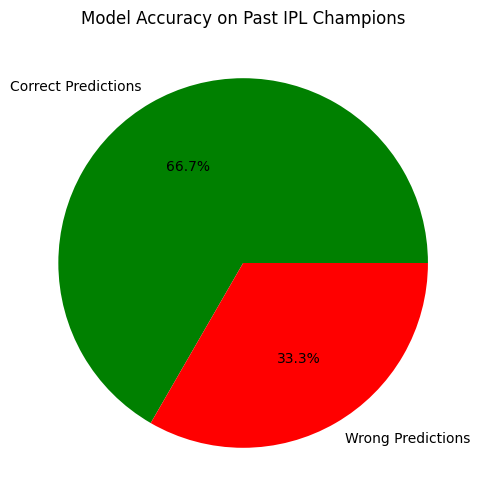

In [212]:
correct_preds = comparison_df['correct'].sum()
total_preds = comparison_df.shape[0]

accuracy = (correct_preds / total_preds) * 100
print(f"🏆 Model Accuracy on Past IPL Champions (2008–2019): {accuracy:.2f}%")

# Pie Chart to show correct vs incorrect
labels = ['Correct Predictions', 'Wrong Predictions']
values = [correct_preds, total_preds - correct_preds]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Model Accuracy on Past IPL Champions")
plt.show()


STEP 10: Simulate IPL 2025 Final – Custom Input

In [217]:
# Simulate 2025 Final: RCB vs PBK
final_2025 = pd.DataFrame({
    'team1': ['Royal Challengers Bangalore'],
    'team2': ['Punjab Kings'],
    'toss_winner': ['Punjab Kings'],
    'venue': ['Narendra Modi Stadium'],
    'city': ['Ahmedabad'],
    'Season': [2025]
})

final_encoded = ct.transform(final_2025)
prediction = model.predict(final_encoded)
print("🏆 Predicted 2025 IPL Winner:", prediction[0])


🏆 Predicted 2025 IPL Winner: Royal Challengers Bangalore


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


STEP 11: Save the Model

In [218]:
pickle.dump(model, open('ipl_model.pkl', 'wb'))
pickle.dump(ct, open('transform.pkl', 'wb'))
print("✅ Model and Transformer Saved Successfully.")

✅ Model and Transformer Saved Successfully.
